In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset into Pandas DataFrames
train_df = pd.read_csv('nlptrain1.csv')
test_df = pd.read_csv('nlptest1.csv')

# Define the features and target variable
X_train = train_df['text']
y_train = train_df['category']
X_test = test_df['text']
y_test = test_df['category']

# Create a TF-IDF vectorizer to convert text data into numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Transform the text data into TF-IDF vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a classifier (e.g., Naive Bayes) on the TF-IDF features
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_str)

Accuracy: 0.8328328328328328
Classification Report:
                                     precision    recall  f1-score   support

                         age_limit       1.00      1.00      1.00        40
                  automatic_top_up       0.90      0.95      0.93        40
                   cancel_transfer       0.95      0.97      0.96        40
                   card_acceptance       1.00      0.21      0.34        39
                      card_arrival       0.71      0.85      0.77        40
            card_delivery_estimate       0.91      0.80      0.85        40
                      card_linking       0.71      1.00      0.83        40
                  card_not_working       0.52      0.85      0.65        40
          card_payment_fee_charged       0.61      0.93      0.73        40
  card_payment_wrong_exchange_rate       0.84      0.95      0.89        40
           contactless_not_working       1.00      0.03      0.05        40
                     exchange_rate

/Users/zaarr/opt/anaconda3/envs/Tensorflow_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zaarr/opt/anaconda3/envs/Tensorflow_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zaarr/opt/anaconda3/envs/Tensorflow_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset into Pandas DataFrames
train_df = pd.read_csv('nlptrain1.csv')
test_df = pd.read_csv('nlptest1.csv')

# Define the features and target variable
X_train = train_df['text']
y_train = train_df['category']
X_test = test_df['text']
y_test = test_df['category']

# Encode the target labels into numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create a TF-IDF vectorizer to convert text data into numerical features (optional)
# You can choose to use TF-IDF or other text vectorization techniques here

# Tokenization and vectorization (convert text to numerical features)
tokenizer = keras.layers.TextVectorization(max_tokens=5000)
tokenizer.adapt(X_train.values)

# Build the DNN model
model = keras.Sequential([
    tokenizer,
    keras.layers.Embedding(input_dim=len(tokenizer.get_vocabulary()), output_dim=128, mask_zero=True),
    keras.layers.GlobalMaxPooling1D(),  # Reduce dimensionality
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
y_pred_encoded = model.predict(X_test)
y_pred = np.argmax(y_pred_encoded, axis=1)

# Decode the numerical predictions back to labels
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred_labels)
classification_report_str = classification_report(y_test, y_pred_labels)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_str)


Epoch 1/5
88/88 [==============================] - 2s 11ms/step - loss: 3.1358 - accuracy: 0.1065 - val_loss: 5.4375 - val_accuracy: 0.0000e+00
Epoch 2/5
88/88 [==============================] - 1s 8ms/step - loss: 2.3607 - accuracy: 0.4720 - val_loss: 7.3064 - val_accuracy: 0.0014
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 1.0476 - accuracy: 0.8128 - val_loss: 10.1735 - val_accuracy: 0.0643
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4471 - accuracy: 0.9185 - val_loss: 11.7392 - val_accuracy: 0.0929
Epoch 5/5
32/32 [==============================] - 0s 1ms/step
Accuracy: 0.8118118118118118
Classification Report:
                                     precision    recall  f1-score   support

                         age_limit       0.97      0.97      0.97        40
                  automatic_top_up       0.90      0.95      0.93        40
                   cancel_transfer       0.93      0.95      0.94        40
                

/Users/zaarr/opt/anaconda3/envs/Tensorflow_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zaarr/opt/anaconda3/envs/Tensorflow_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zaarr/opt/anaconda3/envs/Tensorflow_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [16]:
# Build the DNN model
model = keras.Sequential([
    tokenizer,
    keras.layers.Embedding(input_dim=len(tokenizer.get_vocabulary()), output_dim=128, mask_zero=True),
    keras.layers.GlobalMaxPooling1D(),  # Reduce dimensionality
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(label_encoder.classes_), 
    keras.layers.Attention(use_scale=True))
])

model.summary()

ValueError: Exception encountered when calling layer "attention" "                 f"(type Attention).

Attention layer must be called on a list of inputs, namely [query, value] or [query, value, key]. Received: Tensor("dense_13/BiasAdd:0", shape=(None, 29), dtype=float32).

Call arguments received by layer "attention" "                 f"(type Attention):
  • inputs=tf.Tensor(shape=(None, 29), dtype=float32)
  • mask=None
  • training=None
  • return_attention_scores=False
  • use_causal_mask=False

In [61]:
d2v_model.wv.most_similar(positive=['hot'], topn=10)

[('gay', 0.739388108253479),
 ('â£1.50p', 0.7275198698043823),
 ('w8in', 0.6855700612068176),
 ('secs', 0.6839038133621216),
 ('02073162414', 0.6711332201957703),
 ('relocate', 0.6706814169883728),
 ('4utt', 0.6668498516082764),
 ('dirty', 0.6665506362915039),
 ('cleaning', 0.6620139479637146),
 ('bedreal', 0.6552912592887878)]

In [62]:
d2v_model.wv.most_similar(positive=['enjoy'], topn=10)

[('whats', 0.692950427532196),
 ('ecept', 0.6461871862411499),
 ('deduct', 0.6231467723846436),
 ('sighs', 0.6195566654205322),
 ('sender', 0.6124569177627563),
 ('put', 0.6078450083732605),
 ('tv/', 0.5963074564933777),
 ('billing', 0.5915576815605164),
 ('net', 0.5867791175842285),
 ('unconsciously', 0.5847325921058655)]

In [63]:
d2v_model.wv.most_similar(positive=['congrats'], topn=10)

[('0796.', 0.7959805727005005),
 ('0789.', 0.7671586871147156),
 ('relieved', 0.7529219388961792),
 ('ru', 0.734414279460907),
 ('reply.be', 0.7131716012954712),
 ('heâ\x92s', 0.6947227716445923),
 ('videophones', 0.6941127777099609),
 ('resolution', 0.6904767751693726),
 ('student', 0.6793217062950134),
 ('interview', 0.6788327693939209)]

In [65]:
#Create the LSTM Model

from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding


# init layer
model = Sequential()

# emmbed word vectors
model.add(Embedding(len(d2v_model.wv)+1,20,input_length=X.shape[1],weights=[embedding_matrix],trainable=True))

# learn the correlations
def split_input(sequence):
     return sequence[:-1], tf.reshape(sequence[1:], (-1,1))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(2,activation="softmax"))(original_branch) 

# output model skeleton
model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['acc'])


################ SAVING THE LAST OUTPUT LAYER ##################

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense


################## ATTENTION WEIGHTS ########################

attention_weights = AttentionLayer()(original_branch)


# Merge the attention weights with the new input features
merged_input = Concatenate()([attention_weights, input_new])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 20)            187240    
                                                                 
 lstm (LSTM)                 (None, 50)                14200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 201,542
Trainable params: 201,542
Non-trainable params: 0
_________________________________________________________________


In [70]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [69]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [71]:
Y = pd.get_dummies(df['Category']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4736, 50) (4736, 2)
(836, 50) (836, 2)


In [72]:
batch_size = 32
history=model.fit(X_train, Y_train, epochs =50, batch_size=batch_size, verbose = 2)

Epoch 1/50
148/148 - 3s - loss: 0.2892 - acc: 0.9109 - 3s/epoch - 17ms/step
Epoch 2/50
148/148 - 2s - loss: 0.0576 - acc: 0.9867 - 2s/epoch - 10ms/step
Epoch 3/50
148/148 - 2s - loss: 0.0239 - acc: 0.9949 - 2s/epoch - 10ms/step
Epoch 4/50
148/148 - 2s - loss: 0.0149 - acc: 0.9973 - 2s/epoch - 11ms/step
Epoch 5/50
148/148 - 2s - loss: 0.0073 - acc: 0.9981 - 2s/epoch - 11ms/step
Epoch 6/50
148/148 - 2s - loss: 0.0054 - acc: 0.9989 - 2s/epoch - 10ms/step
Epoch 7/50
148/148 - 2s - loss: 0.0037 - acc: 0.9989 - 2s/epoch - 10ms/step
Epoch 8/50
148/148 - 2s - loss: 0.0019 - acc: 0.9994 - 2s/epoch - 10ms/step
Epoch 9/50
148/148 - 2s - loss: 0.0012 - acc: 0.9996 - 2s/epoch - 10ms/step
Epoch 10/50
148/148 - 2s - loss: 8.5834e-04 - acc: 0.9996 - 2s/epoch - 10ms/step
Epoch 11/50
148/148 - 2s - loss: 6.2585e-04 - acc: 0.9998 - 2s/epoch - 10ms/step
Epoch 12/50
148/148 - 2s - loss: 4.7600e-04 - acc: 1.0000 - 2s/epoch - 10ms/step
Epoch 13/50
148/148 - 2s - loss: 3.9832e-04 - acc: 1.0000 - 2s/epoch - 10

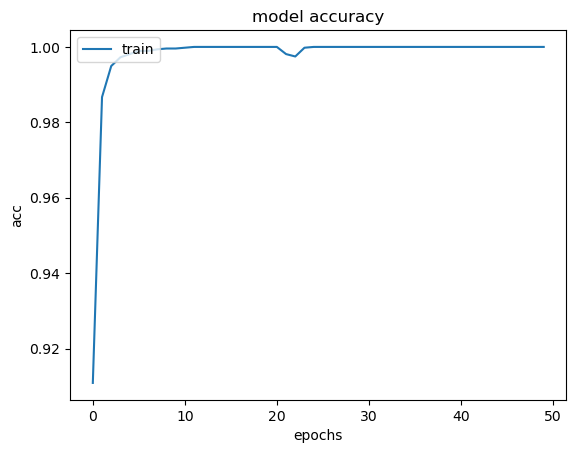

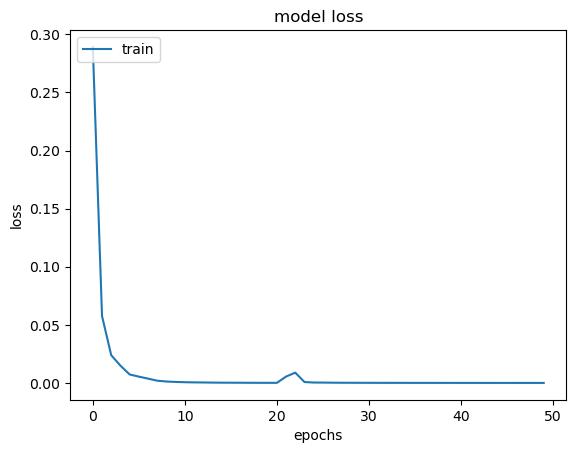

<Figure size 640x480 with 0 Axes>

In [73]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [74]:
# evaluate the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=2)
_, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Train: %.3f, Test: %.4f' % (train_acc, test_acc))

148/148 - 1s - loss: 1.0920e-05 - acc: 1.0000 - 829ms/epoch - 6ms/step
27/27 - 0s - loss: 0.0912 - acc: 0.9904 - 351ms/epoch - 13ms/step
Train: 1.000, Test: 0.9904


In [82]:


# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
print(yhat_probs)
# predict crisp classes for test set
#yhat_classes = model.predict_classes(X_test, verbose=0)
yhat_classes =np.argmax(yhat_probs, axis=1)
print(yhat_classes)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 1



import numpy as np

[[1.0000000e+00 1.4239743e-13]
 [1.0000000e+00 6.0482908e-12]
 [1.0000000e+00 1.8714299e-12]
 ...
 [1.0000000e+00 5.1295719e-13]
 [1.0000000e+00 1.8166558e-13]
 [1.0000000e+00 5.2738765e-11]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0

In [78]:
# Assuming model is your Sequential model
predictions = model.predict(X_test)  # Replace input_data with your data
predicted_classes = np.argmax(predictions, axis=-1)
print(predicted_classes)

27/27 [==============================] - 0s 4ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 

In [83]:


import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,

In [84]:


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, yhat_classes)
cm



array([[727,   2],
       [  6, 101]])

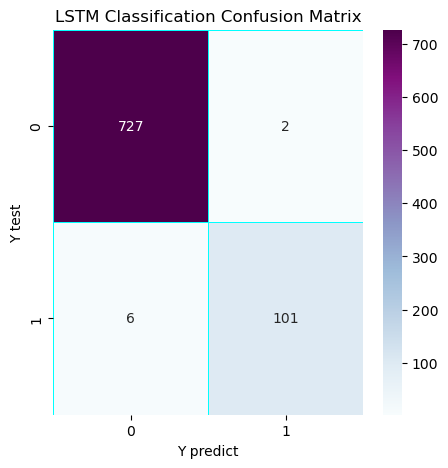

In [85]:


# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

lstm_val = confusion_matrix(rounded_labels, yhat_classes)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lstm_val, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('LSTM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()



In [86]:


validation_size = 200

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 1, batch_size = batch_size)

print("score: %.2f" % (score))
print("acc: %.2f" % (acc))



20/20 [==============================] - 0s 4ms/step - loss: 0.1169 - acc: 0.9890
score: 0.12
acc: 0.99


In [87]:
model.save('Mymodel.h5')

In [88]:


message = ['Congratulations! you have won a $1,000 Walmart gift card. Go to http://bit.ly/123456 to claim now.']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['ham','spam']
print(pred, labels[np.argmax(pred)])



1/1 [==============================] - 0s 23ms/step
[[1.2103091e-08 1.0000000e+00]] spam


In [89]:
message = ['thanks for accepting my request to connect']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['ham','spam']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 24ms/step
[[1.00000e+00 9.18021e-12]] ham
